In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.icm_framework_v2 import ICMFrameworkV2
from utils.reliability_visualizer import ReliabilityVisualizer

###########################################################
# Load Classifier and Data
###########################################################
pipeline = joblib.load('pipeline_classifier.pkl')
training_data = pd.read_csv("./data_train.csv")

y_train = training_data['SOURCE'].map({'out': 0, 'in': 1})
X_train = training_data.drop(columns=['SOURCE'])

X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [2]:
###########################################################
# Initialize ICM (Interpretable Confidence Measures)
###########################################################
##################3 
### Adjust
k_neighbors = 9  # Number of nearest neighbors
icm = ICMFrameworkV2(X_train_preprocessed, y_train.values, k_neighbors=k_neighbors)

In [3]:
###########################################################
# Classification and Reliability
###########################################################
def classify_and_calculate_reliability_icm(new_data, pipeline, icm):
    """
    Predicts the class and calculates a reliability score for a new instance using ICM Framework.

    Parameters:
    - new_data (pd.DataFrame): DataFrame with the same columns as training data.
    - pipeline (Pipeline): The loaded pipeline for preprocessing and classification.
    - icm (ICMFramework): Instance of the ICMFramework initialized with training data and labels.

    Returns:
    - dict: Contains prediction, reliability score, and neighbors used.
    """
    # Preprocess the data
    new_data_preprocessed = pipeline.named_steps['preprocessor'].transform(new_data)
    
    # Predict the label
    predicted_label = pipeline.named_steps['classifier'].predict(new_data_preprocessed)[0]
    
    # Compute the reliability score
    reliability_score = icm.compute_confidence(new_data_preprocessed[0], predicted_label)
    
    return {
        "predicted_label": predicted_label,
        "reliability_score": reliability_score
    }

In [4]:
###########################################################
# Load and Test with Unseen Data
###########################################################
validation_data = pd.read_csv("./data_validation.csv")
validation_data['SOURCE'] = validation_data['SOURCE'].map({'out': 0, 'in': 1})
# first_500_instances = validation_data.iloc[:500]

results = []
# for _, instance in first_500_instances.iterrows():
for _, instance in validation_data.iterrows():
    true_label = instance['SOURCE']
    instance_df = pd.DataFrame([instance.drop(labels=['SOURCE'])])
    result = classify_and_calculate_reliability_icm(
        instance_df,
        pipeline,
        icm
    )
    result['true_label'] = true_label
    results.append(result)

results_df = pd.DataFrame(results)
# results_df

Sigma:
0.009529149098576745
Sigma:
0.011728995698060456
Sigma:
0.02234673339655474
Sigma:
0.04359523758445658
Sigma:
0.0057021154705197245
Sigma:
0.06973827254397154
Sigma:
0.026741688746107408
Sigma:
0.010418200996684019
Sigma:
0.01267607006451855
Sigma:
0.012134184821490116
Sigma:
0.007655012337484006
Sigma:
0.0217995368323836
Sigma:
0.009103551494281359
Sigma:
0.031871321373758484
Sigma:
0.008465114763750996
Sigma:
0.018798473123857393
Sigma:
0.007873074445003608
Sigma:
0.007342178508155311
Sigma:
0.008728518596198033
Sigma:
0.006807198859567619
Sigma:
0.018578702249429053
Sigma:
0.00938150051030831
Sigma:
0.015357886545215783
Sigma:
0.028033073354561004
Sigma:
0.012695350370306339
Sigma:
0.016153515417911105
Sigma:
0.026186125620318145
Sigma:
0.0060817534676520756
Sigma:
0.01628466630443426
Sigma:
0.015816151312875462
Sigma:
0.0037227171069202617
Sigma:
0.020733335015595763
Sigma:
0.005249247430780038
Sigma:
0.04647333136278503
Sigma:
0.007556632492495728
Sigma:
0.00737504405657600

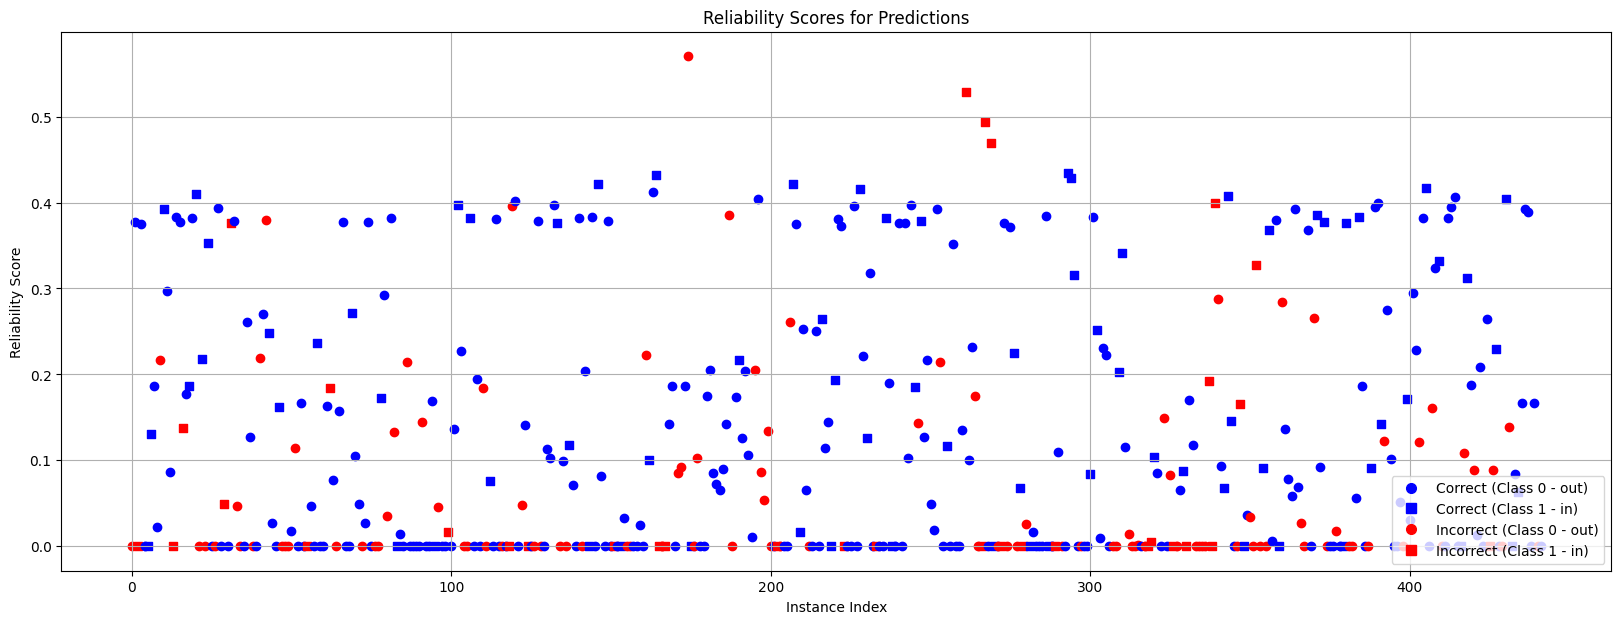

In [5]:
###########################################################
# Results
###########################################################
visualizer = ReliabilityVisualizer(results_df=results_df)

visualizer.plot_reliability_scores((20,7))

### 10

In [6]:
reliability_table_10_df = visualizer.get_reliability_table_10()
print(reliability_table_10_df)

    Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0  [0.00, 0.10]          127             76           25             23
1  ]0.10, 0.20]           38             14           14              4
2  ]0.20, 0.30]           20             10           10              0
3  ]0.30, 0.40]           41              3           16              2
4  ]0.40, 0.50]            4              0           10              3
5  ]0.50, 0.60]            0              1            0              1
6  ]0.60, 0.70]            0              0            0              0
7  ]0.70, 0.80]            0              0            0              0
8  ]0.80, 0.90]            0              0            0              0
9  ]0.90, 1.00]            0              0            0              0


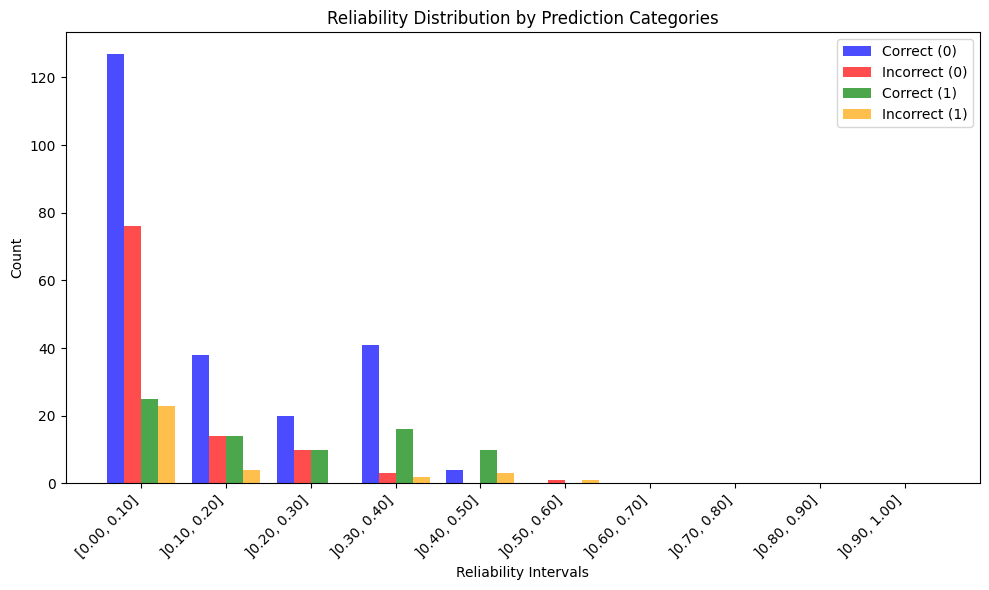

In [7]:
visualizer.plot_table_graph(reliability_table_10_df)

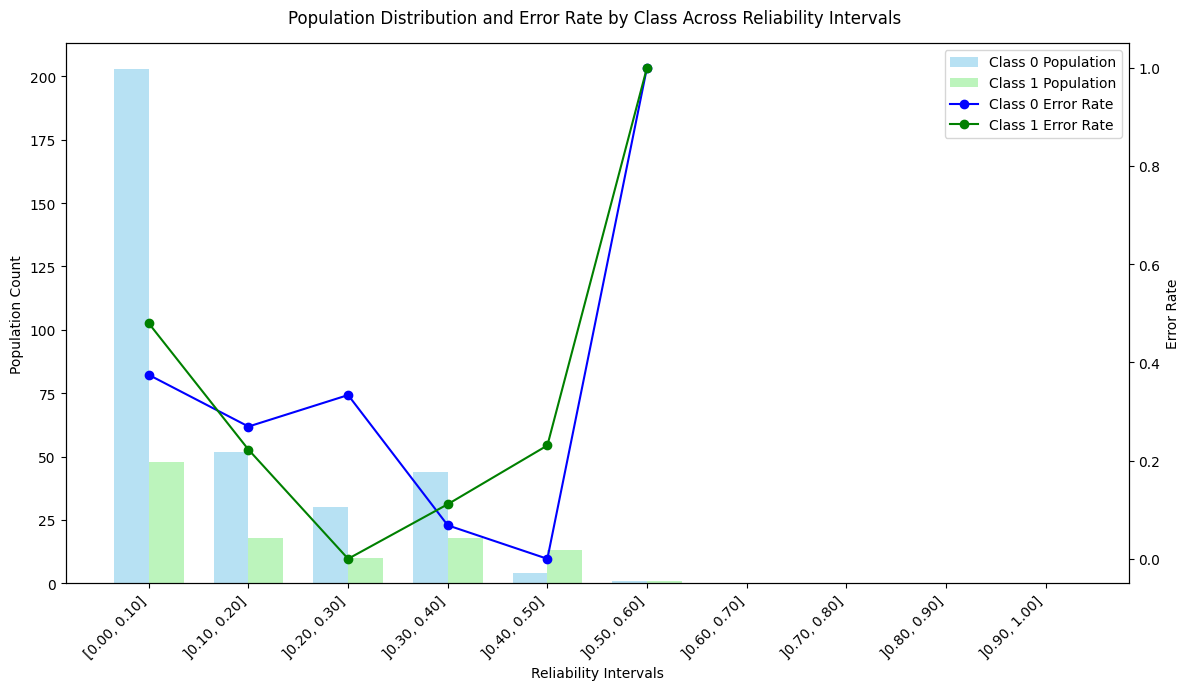

In [8]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_10_df)

Sample reliability interval assignment:
   reliability_score reliability_interval
0           0.000000        (-0.001, 0.1]
1           0.377968           (0.3, 0.4]
2           0.000000        (-0.001, 0.1]
3           0.374606           (0.3, 0.4]
4           0.000000        (-0.001, 0.1]
5           0.000000        (-0.001, 0.1]
6           0.130480           (0.1, 0.2]
7           0.185972           (0.1, 0.2]
8           0.022281        (-0.001, 0.1]
9           0.216245           (0.2, 0.3]


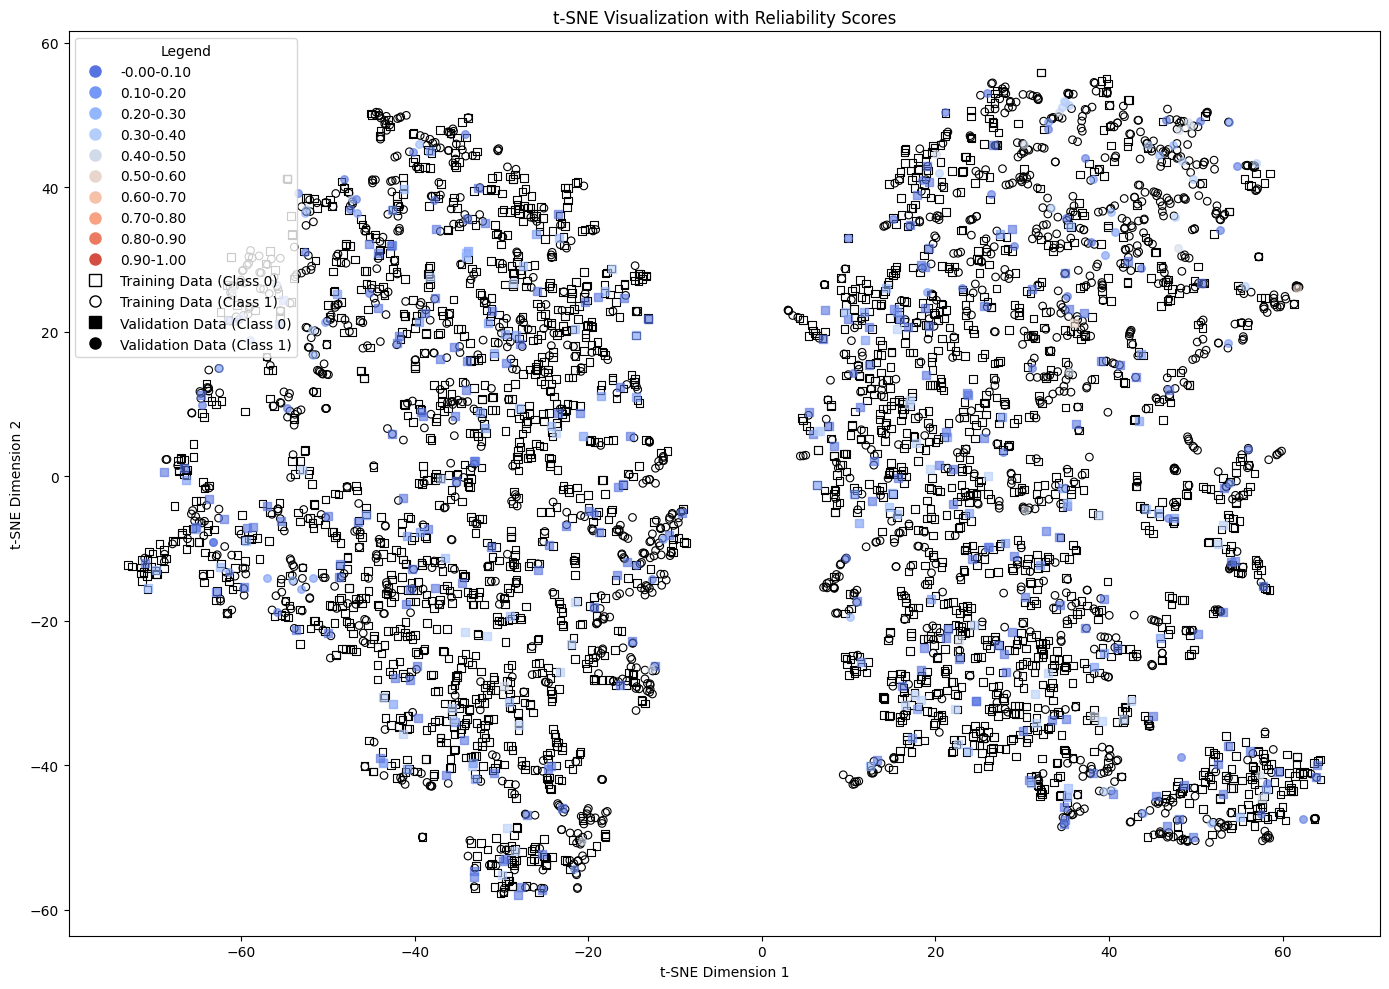

In [9]:
visualizer.plot_tsne_with_reliability(
    X_train_preprocessed, validation_data, y_train, pipeline
)